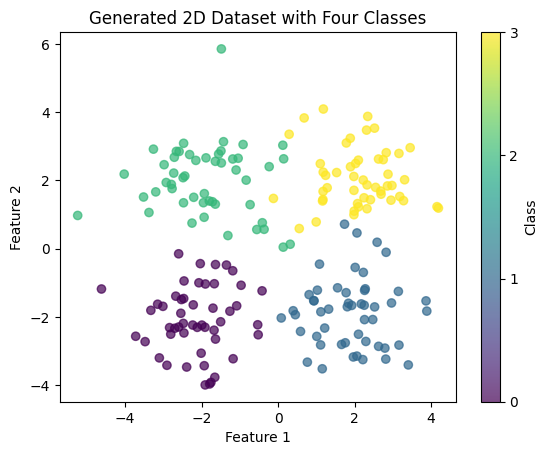

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate class 0 points (Cluster 1)
class_0 = np.random.randn(50, 2) + np.array([-2, -2])

# Generate class 1 points (Cluster 2)
class_1 = np.random.randn(50, 2) + np.array([2, -2])

# Generate class 2 points (Cluster 3)
class_2 = np.random.randn(50, 2) + np.array([-2, 2])

# Generate class 3 points (Cluster 4)
class_3 = np.random.randn(50, 2) + np.array([2, 2])

# Combine all points and labels
X = np.vstack((class_0, class_1, class_2, class_3))
y = np.hstack((np.zeros(50), np.ones(50), np.full(50, 2), np.full(50, 3)))

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("Generated 2D Dataset with Four Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(ticks=[0, 1, 2, 3], label='Class')
plt.show()

In [2]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 692 (2.70 KB)

 Trainable params: 692 (2.70 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3248 - loss: 1.3728 - val_accuracy: 0.3125 - val_loss: 1.2535
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4439 - loss: 1.1563 - val_accuracy: 0.3750 - val_loss: 1.0638
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5427 - loss: 0.9649 - val_accuracy: 0.3750 - val_loss: 0.8989
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6422 - loss: 0.8086 - val_accuracy: 0.6250 - val_loss: 0.7530
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7000 - loss: 0.7109 - val_accuracy: 0.8125 - val_loss: 0.6246
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9047 - loss: 0.5984 - val_accuracy: 0.9375 - val_loss: 0.5059
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9516 - loss: 0.4826 - val_accuracy: 1.0000 - val_loss: 0.4112
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9498 - loss: 0.4211 - val_accuracy: 1.0000 - 

In [7]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9563 - loss: 0.0501 
Test Accuracy: 0.95


343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step


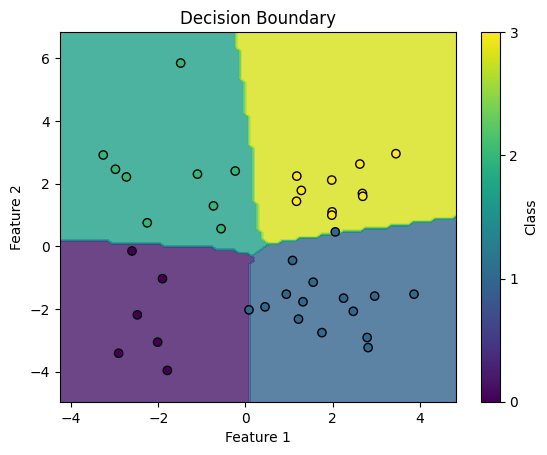

In [10]:
# Function to plot decision boundary for multi-class classification
def plot_decision_boundary(model, X, y):
    # Define the range for the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict class probabilities for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Convert probabilities to class labels
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

    # Plot the original data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='viridis')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(ticks=[0, 1, 2, 3], label='Class')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(model, X_test, y_test)

In [11]:
# same thing with K-means
from sklearn.cluster import KMeans

In [20]:
# Create a KMeans model with 4 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(X_train, y_train)

# Show accuracy
y_pred = kmeans.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.33


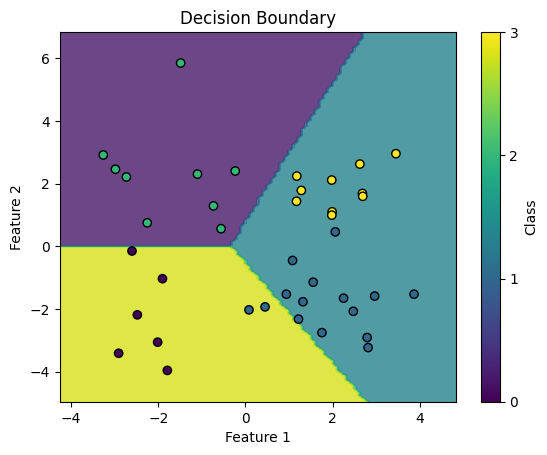

In [21]:
# plot decision boundary
def plot_decision_boundary_kmeans(kmeans, X, y):
    # Define the range for the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict the closest cluster each sample in X belongs to
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Convert the cluster labels to class labels
    Z = np.vectorize({0: 0, 1: 1, 2: 2, 3: 3}.get)(Z)

    # Reshape the predicted labels to the meshgrid shape
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

    # Plot the original data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='viridis')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(ticks=[1, 0, 2, 3], label='Class')
    plt.show()

# Plot the decision boundary
plot_decision_boundary_kmeans(kmeans, X_test, y_test)